In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import os
from load_dust import get_particles, dust_histogram, get_output_times

t(N=18)=2545.5940011239686
t(N=35)=4949.766113296606
t(N=71)=10040.954115544544
t(N=100)=14142.188895133158


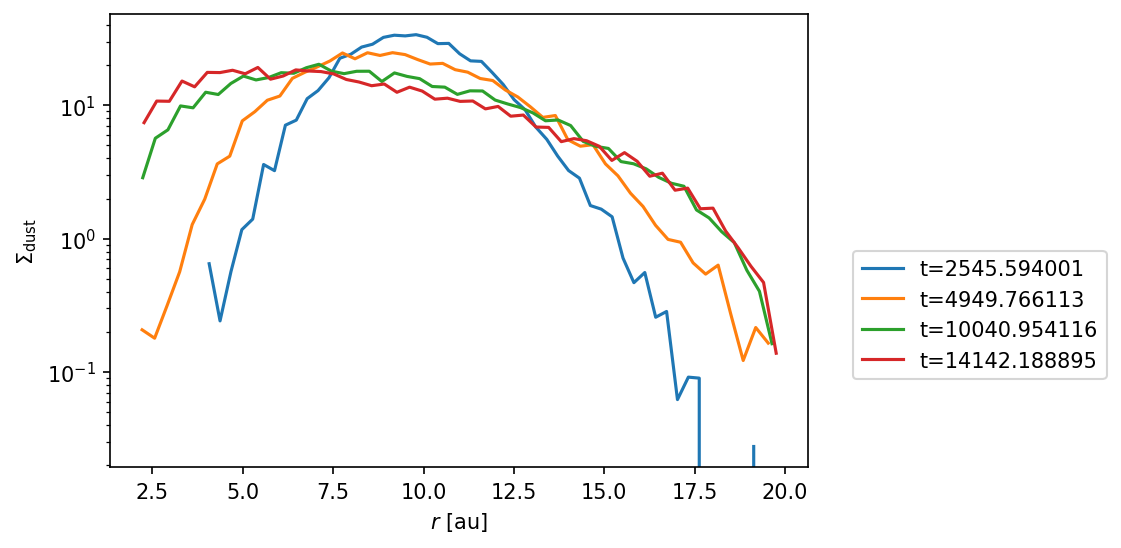

In [3]:
outdir = "output/dust_diffusion_omp"
Noutputs = len(np.unique(np.genfromtxt(outdir+"/snapshots/timeSnapshot.dat"),axis=0))
Nlast = Noutputs-1
Nlast = 100
Noutputs = 101

times = get_output_times(outdir).to_value("yr")

inds = range(0, Noutputs, min(Noutputs, Noutputs//5))
inds = []
for t in [2500, 5000, 10000, 15000]:
    n = np.argmin(np.abs(times-t))
    inds.append(n)

fig, ax = plt.subplots(dpi=150)
ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\Sigma_\mathrm{dust}$")


for N in inds:
    particles = get_particles(outdir, N)
    ri, hist = dust_histogram(particles)
    print(f"t(N={N})={times[N]}")
    r = 0.5*(ri[1:]+ri[:-1])
    ax.plot(r, hist, label=f"t={times[N]:2f}")
    ax.legend(bbox_to_anchor=(1.05,0.5))
    
ax.set_yscale("log")

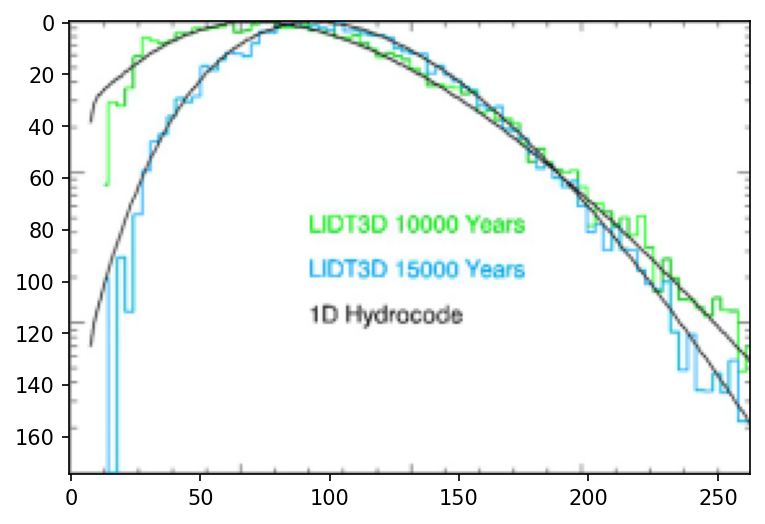

In [55]:
charnoz_plot = "Charnoz_et_al._-_2011_-_THREE-DIMENSIONAL_LAGRANGIAN_TURBULENT_DIFFUSION_O.pdf-use757-272.png"
import cv2
img = cv2.imread(charnoz_plot)
fig, ax = plt.subplots(dpi=150)
early = img[16:191,57:321]
late = img[239:414,58:321]
ax.imshow(late)

t(N=18)=2545.5940011239686
t(N=35)=4949.766113296606
t(N=71)=10040.954115544544
t(N=106)=14990.72022884115
t(N=18)=2545.5940011239686
t(N=35)=4949.766113296606
t(N=71)=10040.954115544544
t(N=106)=14990.72022884115
dust_diffusion_single -
dust_diffusion_fix_omp :


/home/rometsch/.local/lib/python3.8/site-packages/astropy/units/quantity.py:620: RuntimeWarning: divide by zero encountered in log
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


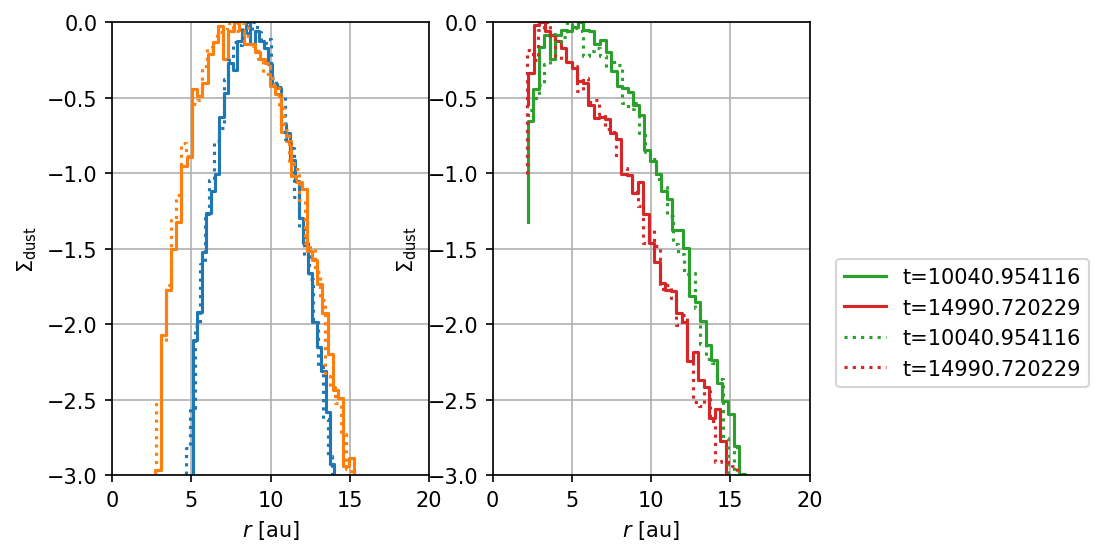

In [71]:
fig, axes = plt.subplots(ncols=2, dpi=150)
for ax in axes:
    ax.set_xlabel(r"$r$ [au]")
    ax.set_ylabel(r"$\Sigma_\mathrm{dust}$")

colors = [f"tab:{c}" for c in ["blue", "orange", "green", "red", "brown", "purple"]]
lss = ["-", ":"]
outputdirs = ["output/dust_diffusion_single",  "output/dust_diffusion_fix_omp"]


for k, outdir in enumerate(outputdirs):
    Noutputs = len(np.unique(np.genfromtxt(outdir+"/snapshots/timeSnapshot.dat"),axis=0))
    Nlast = Noutputs-1
    Nlast = 100
    Noutputs = 101

    times = get_output_times(outdir).to_value("yr")

    inds = range(0, Noutputs, min(Noutputs, Noutputs//5))
    inds = []
    for t in [2500, 5000, 10000, 15000]:
        n = np.argmin(np.abs(times-t))
        inds.append(n)


    for n, N in enumerate(inds):
        particles = get_particles(outdir, N)
        ri, hist = dust_histogram(particles)
        print(f"t(N={N})={times[N]}")
        r = 0.5*(ri[1:]+ri[:-1])
        color = colors[n]
        ls = lss[k]
        
        ax = axes[0 if n < len(inds)/2 else 1]
        
        Y = hist
        ax.plot(r, Y, label=f"t={times[N]:2f}", color=color, ls=ls, drawstyle="steps")


axes[1].legend(bbox_to_anchor=(1.05,0.5))        
for ax in axes:
    # ax.set_yscale("log")
    ax.grid()
    ax.set_xlim(0,20)
    ax.set_ylim(-3, 0)
    # ax.set_xticks(np.arange(0,21))

for name, ls in zip(outputdirs, lss):
    name = os.path.basename(name)
    print(name, ls)


t(N=18)=2545.5940011239686
t(N=35)=4949.766113296606
t(N=71)=10040.954115544544
t(N=106)=14990.72022884115


(0.01, 100.0)

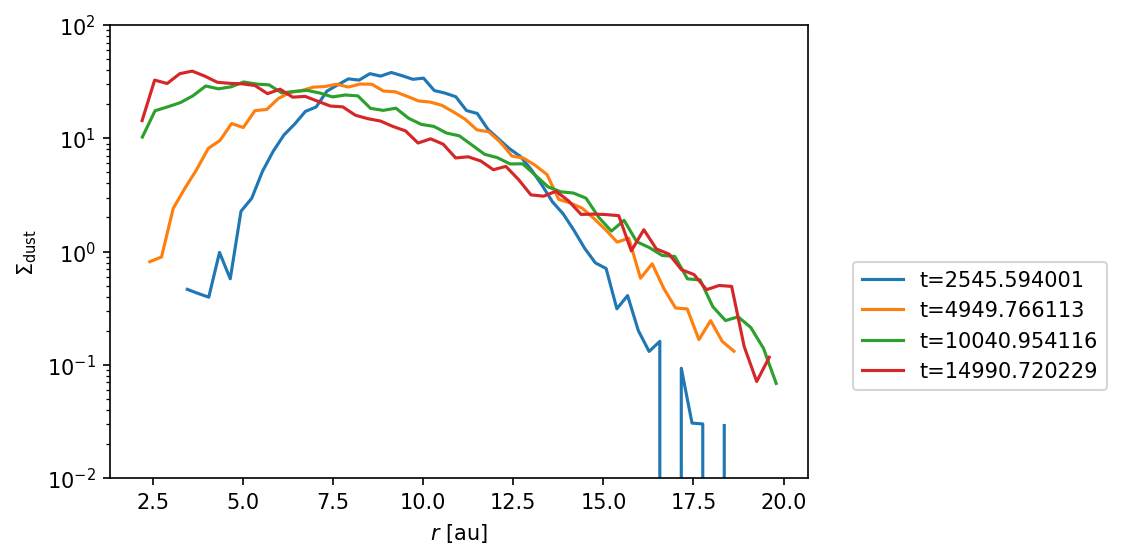

In [11]:
outdir = "output/dust_diffusion"
Noutputs = len(np.unique(np.genfromtxt(outdir+"/snapshots/timeSnapshot.dat"),axis=0))
Nlast = Noutputs-1
Nlast = 100
Noutputs = 101

times = get_output_times(outdir).to_value("yr")

inds = range(0, Noutputs, min(Noutputs, Noutputs//5))
inds = []
for t in [2500, 5000, 10000, 15000]:
    n = np.argmin(np.abs(times-t))
    inds.append(n)

fig, ax = plt.subplots(dpi=150)
ax.set_xlabel(r"$r$ [au]")
ax.set_ylabel(r"$\Sigma_\mathrm{dust}$")


for N in inds:
    particles = get_particles(outdir, N)
    ri, hist = dust_histogram(particles)
    print(f"t(N={N})={times[N]}")
    r = 0.5*(ri[1:]+ri[:-1])
    ax.plot(r, hist, label=f"t={times[N]:2f}")
    ax.legend(bbox_to_anchor=(1.05,0.5))

ax.set_yscale("log")
ax.set_ylim(1e-2, 1e2)